# Information Retrieval in High Dimensional Data
### Assignment 1

Members: Hashir Ahmad (03708887), Mohd Toaha Umar (), Florian Auinger (), Rasmus Schamper (), 

## Task 1

$C_d = \{\mathbf{x} \in \mathbb{R}^p | {\lVert\mathbf{x}\rVert}_{\infty} \leq \frac{d}{2}\}$

1. $\mathcal{Pr}(\mathbf{X} \in C_d) = q$

$\implies \mathcal{Pr}({\lVert\mathbf{X}\rVert}_{\infty} \leq \frac{d}{2}\} = q$

$= \mathcal{Pr}(max (\lvert{X_1}\rvert, \lvert{X_2}\rvert, ... , \rvert{X_p}\lvert \leq \frac{d}{2}) = q$

$= \mathcal{Pr}(\lvert{X_1}\rvert \leq \frac{d}{2}, \lvert{X_2}\rvert \leq \frac{d}{2}, ..., \lvert{X_p}\rvert \leq \frac{d}{2})$

$= \mathcal{Pr}(\lvert{X_1}\rvert \leq \frac{d}{2})\mathcal{Pr}(\lvert{X_2}\rvert \leq \frac{d}{2})...\mathcal{Pr}(\lvert{X_p}\rvert \leq \frac{d}{2}) = q$

$= \prod_{i=1}^{p}\mathcal{Pr}(\lvert{X_i}\rvert \leq \frac{d}{2}) = q$

Since X is uniformly distributed, $\mathcal{Pr}(\lvert{X_1}\rvert) = \mathcal{Pr}(\lvert{X_2}\rvert) = ... = \mathcal{Pr}(\lvert{X_p}\rvert) = \frac{1}{\frac{d}{2} - (-\frac{d}{2})} = \frac{1}{d}$

$\implies (\frac{1}{d})^p = q$

or $d = \frac{1}{q^\frac{1}{p}}$

2. $\mathcal{Pr}(\lvert{X^1}\rvert \leq 2.576) = 0.99$

Now, $\mathcal{Pr}(\lVert{X^p}\rVert_{\infty} > 2.576) = 1 - \mathcal{Pr}(\lVert{X^p}\rVert_{\infty} \leq 2.576)$

$= 1 - \mathcal{Pr}(max (\lvert{X^1}\rvert, \lvert{X^2}\rvert, ... , \rvert{X^p}\lvert) \leq 2.576)$

$= 1 - \mathcal{Pr}(\lvert{X^1}\rvert \leq 2.576, \lvert{X^2}\rvert \leq 2.576, ..., \lvert{X^p}\rvert \leq 2.576)$

Since, the components of $X^p$ are independent,
$= 1 - \prod_{i=1}^{p}\mathcal{Pr}(\lvert{X^i}\rvert \leq 2.576)$

$= 1 - (0.99)^p$

* p = 2 $\implies \mathcal{Pr}(\lVert{X^p}\rVert_{\infty} > 2.576) = 1 - (0.99)^2 = 0.0199$
* p = 3 $\implies \mathcal{Pr}(\lVert{X^p}\rVert_{\infty} > 2.576) = 1 - (0.99)^3 = 0.0297$
* p = 500 $\implies \mathcal{Pr}(\lVert{X^p}\rVert_{\infty} > 2.576) = 1 - (0.99)^{500} = 0.9934$

## Task 2

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10.0, 8.0]


def create_uniform_vec(d, n):
    s = np.random.uniform(-1,0,d)
    for x in range(1, n):
        temp_vec=np.random.uniform(-1,1,d)
        s = np.vstack([s, temp_vec])

    return(s)


def get_min_angle(s, n, n_self):
    min_angle=100
    for counter in range(0, n):
        if counter!=n_self:
            temp_min_angle= np.arccos(np.dot(s[n_self ,:], s[counter ,:])/(LA.norm(s[n_self ,:])*LA.norm(s[counter ,:])))
            #print(temp_min_angle)
            if temp_min_angle<min_angle:
                min_angle=temp_min_angle
                
    return min_angle
    

def get_min_angle_avg(d, n):
    s_vec=create_uniform_vec(d, n)

    min_angle_vec=get_min_angle(s_vec, n, 0)
    for counter in range(1, n):
        min_angle_temp=get_min_angle(s_vec, n, counter)
        min_angle_vec=np.vstack([min_angle_vec, min_angle_temp])
    min_angle_avg=np.average(min_angle_vec)
    
    return min_angle_avg

def avg_min_angle_per_dim(sample_size):
    d_start=1
    d_end=1000
    sample_size=sample_size
    average_min_per_dim = np.zeros((d_end-d_start+1,2)) 
    
    for counter  in range(d_start, d_end):
        average_min_per_dim[counter,0]=counter
        average_min_per_dim[counter,1]=get_min_angle_avg(counter, sample_size)
    
    return average_min_per_dim

def plot_avg_min_angle(sample_size, average_min_per_dim):
    plt.plot(average_min_per_dim[:,0], average_min_per_dim[:,1], 'ro')
    plt.ylabel('average min angle in rad')
    plt.xlabel('Dimention')
    plt.title('Average minimum angle over dimensions ({} Samples)'.format(sample_size))
    plt.grid(True)
    plt.show()

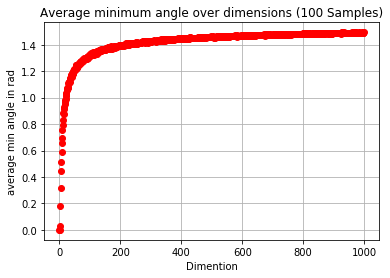

In [2]:
average_min_per_dim = avg_min_angle_per_dim(100)
plot_avg_min_angle(100, average_min_per_dim)

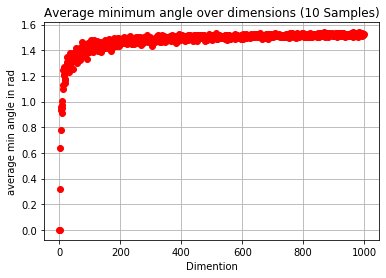

In [3]:
average_min_per_dim2 = avg_min_angle_per_dim(10)
plot_avg_min_angle(10, average_min_per_dim2)

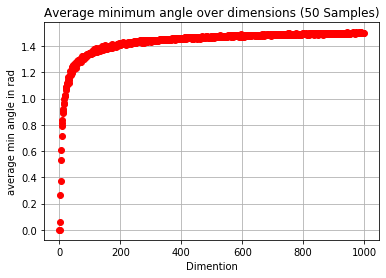

In [4]:
average_min_per_dim3 = avg_min_angle_per_dim(50)
plot_avg_min_angle(50, average_min_per_dim3)

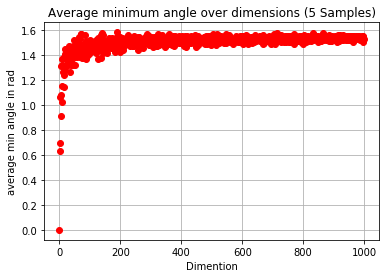

In [5]:
average_min_per_dim4 = avg_min_angle_per_dim(5)
plot_avg_min_angle(5, average_min_per_dim4)

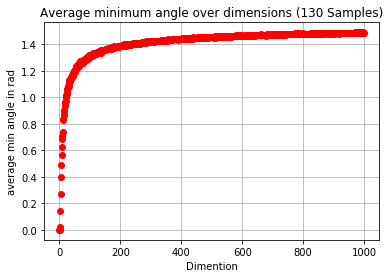

In [6]:
average_min_per_dim5 = avg_min_angle_per_dim(130)
plot_avg_min_angle(130, average_min_per_dim5)

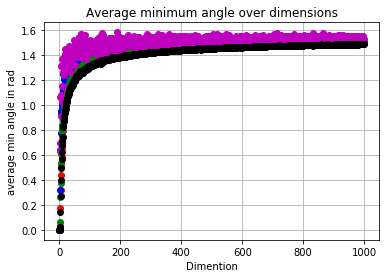

In [7]:
plt.plot(average_min_per_dim[:,0], average_min_per_dim[:,1], 'ro')
plt.plot(average_min_per_dim2[:,0], average_min_per_dim2[:,1], 'bo')
plt.plot(average_min_per_dim3[:,0], average_min_per_dim3[:,1], 'go')
plt.plot(average_min_per_dim4[:,0], average_min_per_dim4[:,1], 'mo')
plt.plot(average_min_per_dim5[:,0], average_min_per_dim5[:,1], 'ko')
plt.ylabel('average min angle in rad')
plt.xlabel('Dimention')
plt.title('Average minimum angle over dimensions')
plt.grid(True)
plt.show()

## Task 3


1. Yes, the table is a probability table, because it denotes the probability of every possible outcome, and therefore, the sum of all probabilities given in the table is 1.


2. 
    * (Part 1) From the Table given in Figure 1, we can find out $P_{X=2}[X]$ as
$$P_{X=2}[X] = P_{XY}[X=2,Y=1]+P_{XY}[X=2,Y=2]+P_{XY}[X=2,Y=3]$$
$$P_{X=2}[X]= 0.4+0.14+0.05=0.59$$
The expectation can be given as:
$$E_{Y|X=2}[Y]=\sum_{y=1}^{3} y P_{Y|X}(Y=y|X=2)$$
$$ \implies E_{Y|X=2}[Y]= 1*P_{Y|X}(Y=1|X=2)+2*P_{Y|X}(Y=2|X=2)+ 3*P_{Y|X}(Y=3|X=2) $$
	$$ \implies E_{Y|X=2}[Y]= 1*\frac{P_{Y,X}(Y=1,X=2)}{P_{X}(X=2)}+2*\frac{P_{Y,X}(Y=2,X=2)}{P_{X}(X=2)}+ 3*\frac{P_{Y,X}(Y=3,X=2)}{P_{X}(X=2)} $$
	$$ \implies E_{Y|X=2}[Y]= 1*\frac{0.4}{0.59}+2*\frac{0.14}{0.59}+ 3*\frac{0.05}{0.59} $$
	$$ \implies E_{Y|X=2}[Y]= \frac{83}{59}=1.406 $$
    
    * (Part 2)$$P_{X|Y}(X=1|Y=3)= \frac{P_{XY}(X=1,Y=3)}{P_{Y}(Y=3)}$$
	$$\implies P_{X|Y}(X=1|Y=3)= \frac{0.13}{0.18}= \frac{13}{18}$$
    
    
3. For a function $p(x,y)$ to be a joint probability distribution function, it has to satisfy the following condition:
	$$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} p(x,y) dx dy = 1....... 		(1)	$$
	
	Here, $$p(x,y)=1,  \forall  0\leq x \leq 1, 0 \leq y \leq \frac{1}{2}$$
	$$\implies \int_{0}^{1} \int_{0}^{\frac{1}{2}} 1 dx dy= \frac{1}{2}$$
	Since $p(x,y)$ does not satisfy the aforementioned condition in (1), it is not a joint probability distribution function.
    
    
4. The marginal density function $p(x)$ is given by
	$$p(x)=\int_{-\infty}^{\infty}p(x,y)dy$$
	$$p(x)=\int_{-\infty}^{\infty}2e^{-(x+y)}dy$$
	$$p(x)=2e^{-x}\int_{0}^{\infty}e^{-y}dy$$
	$$p(x)=-2e^{-x}[e^{-y}]_{0}^{\infty}$$
	$$p(x)=2e^{-x} \forall 0 \leq x \leq y$$
	The marginal density function $p(y)$ is given by
	$$p(y)=\int_{-\infty}^{\infty}p(x,y)dx$$
	$$p(y)=\int_{-\infty}^{\infty}2e^{-(x+y)}dx$$
	$$p(y)=2e^{-y}\int_{0}^{y}e^{-x}dx$$
	$$p(y)=-2e^{-y}[e^{-x}]_{0}^{y}$$
	$$p(y)=-2e^{-y}(e^{-y}-1) \forall 0 \leq y$$
    
    
5. The marginal density function $P_{Y}(y)$ is given by
	$$P_{Y}(y)=\int_{-\infty}^{\infty}p(x,y)dx$$ 
	$$P_{Y}(y)=\int_{0}^{3}\frac{1}{15}(2x+4y)dx$$
	$$P_{Y}(y)=\frac{1}{15}[\int_{0}^{3}2xdx + \int_{0}^{3}4ydx]$$ 
	$$P_{Y}(y)= \frac{1}{15}[2[\frac{x^{2}}{2}]_{0}^3 + 12y]$$
	$$P_{Y}(y)=\frac{9+12y}{15} \forall 0<y<1$$
    The conditional probability distribution $P_{X|Y}(x,y)$ is given by
	$$ P_{X|Y}(x|y)= \frac{P_{X,Y}(x,y)}{P_{Y}(y)}$$
	$$\implies P_{X|Y}(x|y)= \frac{2x+4y}{9+12y} \forall 0 \leq x \leq 3, 0<y<1$$
	
	$$P(X\leq 2|Y=\frac{1}{2}) = \int_{0}^{2}P_{X|Y}(x,y)dx$$
	$$P(X\leq 2|Y=\frac{1}{2}) = \int_{0}^{2}\frac{2x+4y}{9+12y}dx$$
	$$P(X\leq 2|Y=\frac{1}{2}) = \frac{1}{9+12y}[\int_{0}^{2}2xdx + \int_{0}^{2}4ydx]$$
	$$P(X\leq 2|Y=\frac{1}{2}) = \frac{1}{9+12y}[2[\frac{x^{2}}{2}]_{0}^2 + 8y]$$
	$$P(X\leq 2|Y=\frac{1}{2}) = \frac{1}{9+12y}[4 + 8y]$$
	Substituting $y=\frac{1}{2}$ in the above equation, we get
	$$P(X\leq 2|Y=\frac{1}{2}) = \frac{8}{15}$$

## Task 4

### Definitions
**Covariance Matrix:** $ \mathbf{C} \triangleq E\{(\mathbf{x}-E(\mathbf{x})(\mathbf{x}-E(\mathbf{x}))^T\} $ \
**Positive semi-definite:** A symmetric matrix $\mathbf{C}$ of size $ n\times n \  $ is positive semi-definite if and only if $ \mathbf{u}^T\mathbf{C}\mathbf{u}⩾0 $
for every $ \ n \times 1 $ (column) vector $\mathbf{u}$, where $\mathbf{u}^T$ is the $ 1 \times n $ transposed (line) 
vector. 

### Proof 1: Symmetric

\begin{array}{rcl}
\mathbf{C}^T & = &(E\{(\mathbf{x}-E(\mathbf{x})(\mathbf{x}-E(\mathbf{x}))^T\})^T \\
& = & E\{(\mathbf{x}-E(\mathbf{x}))^T((\mathbf{x}-E(\mathbf{x}))^T)^T\} \\
& = & E\{(\mathbf{x}-E(\mathbf{x}))^T(\mathbf{x}-E(\mathbf{x}))\} \\
& = & E\{(\mathbf{x}-E(\mathbf{x}))(\mathbf{x}-E(\mathbf{x}))^T\} \\
& = & \mathbf{C}
\end{array}


### Proof 2: Positive semi-definite
 
For an arbitrary real vector $ \mathbf{u} $, we can write,

\begin{array}{rcl}
\mathbf{u}^T\mathbf{C}\mathbf{u} & = & \mathbf{u}^TE\{(\mathbf{x}-E(\mathbf{x})(\mathbf{x}-E(\mathbf{x}))^T\}\mathbf{u} \\
& = & E\{\mathbf{u}^T(\mathbf{x}-E(\mathbf{x})(\mathbf{x}-E(\mathbf{x}))^T\mathbf{u}\} \ \text{(Linearity of expectation)} \\
& = & E\{(\mathbf{u}^T(\mathbf{x}-E(\mathbf{x})))^2\} \text{, where} \ \mathbf{u}^T(\mathbf{x}-E(\mathbf{x})) \ \text{is a is a real valued random variable} \\
& \ge & 0. 
\end{array}


The square of any real number is equal to or greater than zero. That is,
$ (\mathbf{u}^T(\mathbf{x}-E(\mathbf{x})))^2 \ge 0 $.
Thus,
$ \mathbf{u}^T\mathbf{C}\mathbf{u} \ge 0 $ for any $\mathbf{u}$.
Which implies that covariance matrix of any real random vector is always positive semi-definite.